<a href="https://colab.research.google.com/github/Nabanita29/Research/blob/main/Android_Malware_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
np.random.seed(0)
from sklearn.metrics import precision_score,recall_score,f1_score
import tensorflow as tf
tf.compat.v1.set_random_seed(0)
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df2 = pd.read_csv('/content/drebin215dataset5560malware9476benign.csv')

<ipython-input-74-37efde503a48>:1: DtypeWarning: Columns (92) have mixed types. Specify dtype option on import or set low_memory=False.


Data Cleaning and Processing

In [ ]:
classes,count = np.unique(df2['class'],return_counts=True)
#Perform Label Encoding
lbl_enc = LabelEncoder()
print(lbl_enc.fit_transform(classes),classes)
df2 = df2.replace(classes,lbl_enc.fit_transform(classes))

#Dataset contains special characters like ''?' and 'S'. Set them to NaN and use dropna() to remove them
df2=df2.replace('[?,S]',np.NaN,regex=True)
print("Total missing values : ",sum(list(df2.isna().sum())))
df2.dropna(inplace=True)
for c in df2.columns:
    df2[c] = pd.to_numeric(df2[c])
df2

[0 1] ['B' 'S']
Total missing values :  5


,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,0,0,0,0,0
15032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
15033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
15034,1,1,1,1,1,1,0,1,1,1,...,1,0,0,1,1,1,0,0,0,0


Data Visualisation

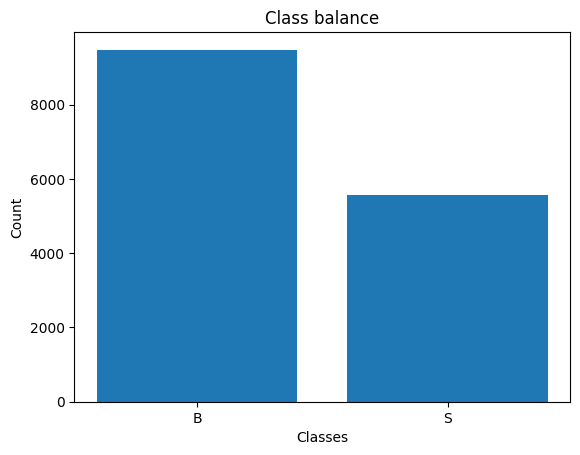

In [ ]:
plt.bar(classes,count)
plt.title("Class balance")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

Splitting into training and testing set

In [ ]:
train_x,test_x,train_y,test_y = train_test_split(df2[df2.columns[:len(df2.columns)-1]].to_numpy(),df2[df2.columns[-1]].to_numpy(),test_size = 0.2,shuffle=True)

In [ ]:
print("Train features size : ",len(train_x))
print("Train labels size : ",len(train_y))
print("Test features size : ",len(test_x))
print("Test features size : ",len(test_y))

Train features size :  12024
Train labels size :  12024
Test features size :  3007
Test features size :  3007


Support Vector Machine

Accuracy: 0.9810442301296973
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1930
           1       0.98      0.96      0.97      1077

    accuracy                           0.98      3007
   macro avg       0.98      0.98      0.98      3007
weighted avg       0.98      0.98      0.98      3007



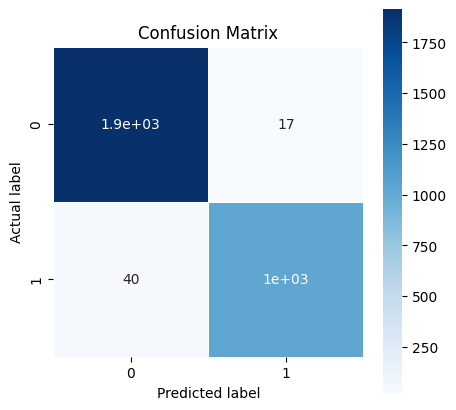

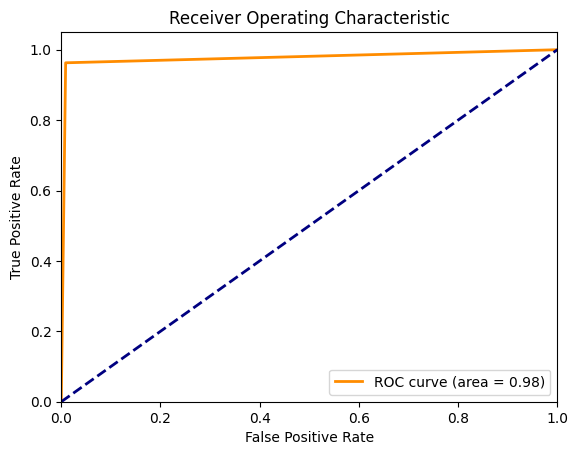

In [ ]:
from sklearn.svm import SVC

# Create an SVM model
model = SVC(kernel='linear', C=1.0)  # You can also try other kernels like 'rbf', 'poly', etc.

# Train the model
model.fit(train_x, train_y)

# Predict on the test set
y_pred = model.predict(test_x)

# Calculate and print accuracy
accuracy = accuracy_score(test_y, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification report:\n", classification_report(test_y, y_pred))

# Create a confusion matrix
cm = confusion_matrix(test_y, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(data=cm, linewidths=.5, annot=True, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC curve
fpr, tpr, _ = roc_curve(test_y, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Random Forest

Accuracy: 0.9933488526770868
Precision: 0.993358982118886
Recall: 0.9933488526770868
F1-score: 0.9933419348195003


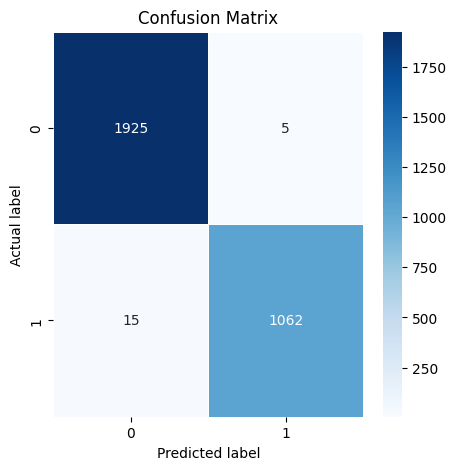

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.99      1.00      0.99      1930
     Class 1       1.00      0.99      0.99      1077

    accuracy                           0.99      3007
   macro avg       0.99      0.99      0.99      3007
weighted avg       0.99      0.99      0.99      3007



In [ ]:
from sklearn.ensemble import RandomForestClassifier


# Create a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# Train the model
clf.fit(train_x, train_y)

# Predict on the test set
y_pred = clf.predict(test_x)

# Calculate and print accuracy
accuracy = accuracy_score(test_y, y_pred)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1-score
precision = precision_score(test_y, y_pred, average='weighted')
recall = recall_score(test_y, y_pred, average='weighted')
f1 = f1_score(test_y, y_pred, average='weighted')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Create a confusion matrix
confusion_mat = confusion_matrix(test_y, y_pred)

# Visualize confusion matrix using a heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(data=confusion_mat, linewidths=.5, annot=True, fmt="d", cmap="Blues")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Display classification report in a visual format
classification_rep = classification_report(test_y, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:\n", classification_rep)


Decision Tree Classifier

Classification report - 
               precision    recall  f1-score   support

           0       0.95      0.87      0.91      1930
           1       0.80      0.92      0.86      1077

    accuracy                           0.89      3007
   macro avg       0.88      0.90      0.88      3007
weighted avg       0.90      0.89      0.89      3007



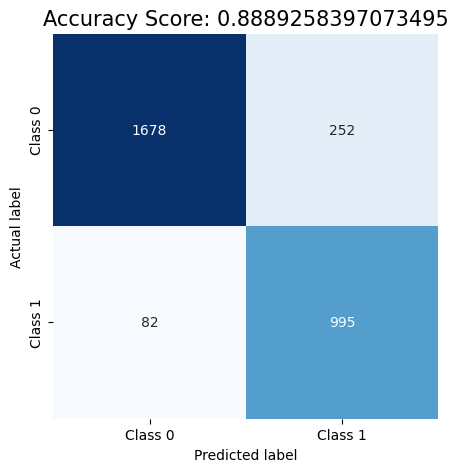

Accuracy is 88.89258397073495
Precision is 79.79149959903768


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DecisionTreeClassifier with entropy criterion and specified hyperparameters
train_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_leaf=5, random_state=100)

# Fit the model on the training data
train_entropy.fit(train_x, train_y)

# Predict on the test data
y_predict = train_entropy.predict(test_x)

# Print classification report
print("Classification report - \n", classification_report(test_y, y_predict))

# Create confusion matrix
cm = confusion_matrix(test_y, y_predict)

# Create a more informative confusion matrix heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(data=cm, annot=True, fmt='d', cmap='Blues', square=True, cbar=False,
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(train_entropy.score(test_x, test_y))
plt.title(all_sample_title, size=15)
plt.savefig("confusion_matrix.png")
plt.show()

# Calculate and print accuracy and precision scores
accuracy = accuracy_score(test_y, y_predict) * 100
precision = precision_score(test_y, y_predict) * 100
print("Accuracy is", accuracy)
print("Precision is", precision)


Building, Training, Visualizing training progress, predicting, and evaluating a neural network model for binary classification using Keras

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, None, 215)         46440     
                                                                 
 dense_10 (Dense)            (None, None, 100)         21600     
                                                                 
 dense_11 (Dense)            (None, None, 1)           101       
                                                                 
Total params: 68,141
Trainable params: 68,141
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
376/376 [==============================] - 5s 8ms/step - loss: 0.1096 - accuracy: 0.9623 - val_loss: 0.1151 - val_accuracy: 0.9581
Epoch 2/5
376/376 [==============================] - 2s 6ms/step - loss: 0.0560 - accuracy: 0.9819 - val_loss: 0.0425 - val_accuracy: 0.9844
Epoch 3/5
376/376 [=============

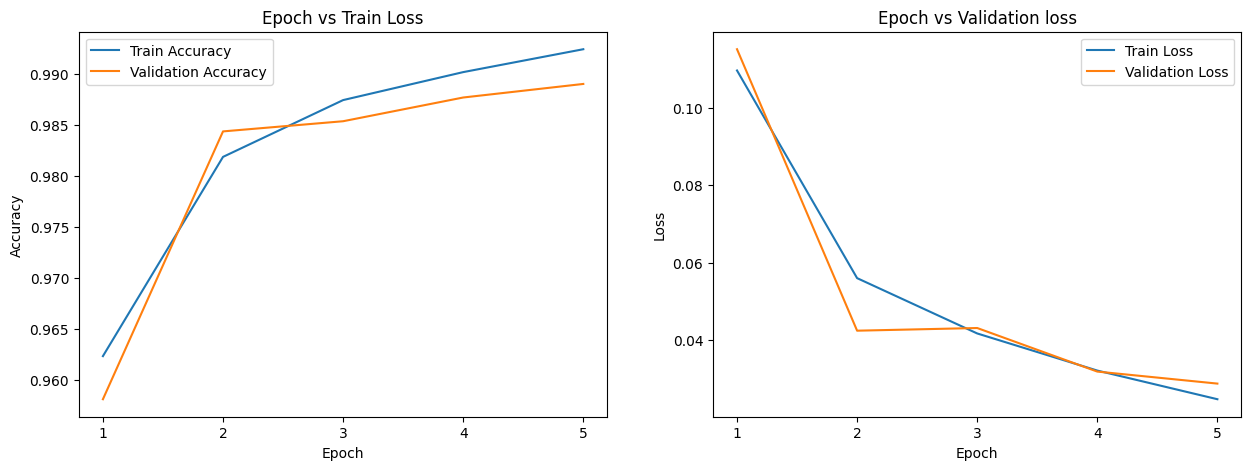

94/94 [==============================] - 0s 3ms/step
Precision :  98.51301115241635
Recall :  98.42154131847725
F1 Score :  98.46725499303298


In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(215,activation='relu',input_shape=(None,215)))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.summary()
model.compile(optimizer = keras.optimizers.RMSprop(0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
ep=5
history = model.fit(train_x,
                    train_y,
                    validation_data = (test_x,test_y),
                    epochs = ep)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot([str(i) for i in range(1,ep+1)],history.history['accuracy'],label="Train Accuracy")
plt.plot([str(i) for i in range(1,ep+1)],history.history['val_accuracy'],label="Validation Accuracy")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Epoch vs Train Loss")

plt.subplot(1,2,2)
plt.plot([str(i) for i in range(1,ep+1)],history.history['loss'],label="Train Loss")
plt.plot([str(i) for i in range(1,ep+1)],history.history['val_loss'],label="Validation Loss")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Epoch vs Validation loss")

plt.show()

y_pred = model.predict(test_x)
for i in range(len(y_pred)):
    if y_pred[i] > (1-y_pred[i]):
        y_pred[i]=1
    else:
        y_pred[i]=0
print("Precision : ",precision_score(test_y,y_pred)*100)
print("Recall : ",recall_score(test_y,y_pred)*100)
print("F1 Score : ",f1_score(test_y,y_pred)*100)



Gradient Boosting Classifier

Accuracy: 0.9720651812437645
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1930
           1       0.98      0.94      0.96      1077

    accuracy                           0.97      3007
   macro avg       0.97      0.97      0.97      3007
weighted avg       0.97      0.97      0.97      3007



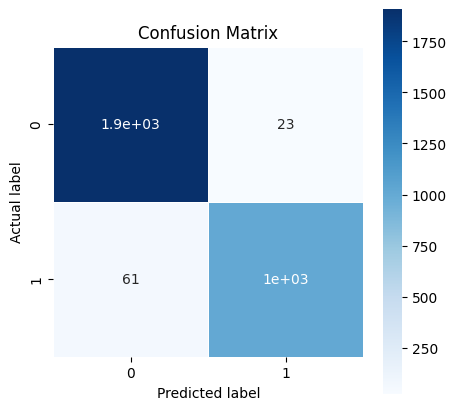

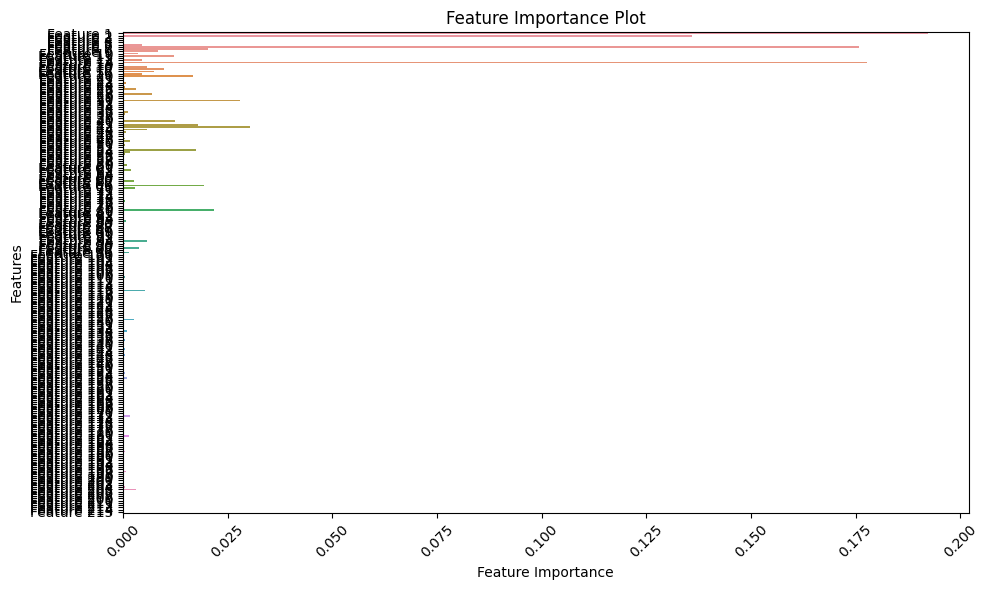

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
model.fit(train_x, train_y)

# Predict on the test set
y_pred = model.predict(test_x)

# Calculate and print accuracy
accuracy = accuracy_score(test_y, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification report:\n", classification_report(test_y, y_pred))

# Create a confusion matrix
cm = confusion_matrix(test_y, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(data=cm, linewidths=.5, annot=True, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Visualize feature importances
feature_importances = model.feature_importances_
feature_names = [f'Feature {i+1}' for i in range(len(feature_importances))]
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.xticks(rotation=45)  # Rotate the y-axis labels by 45 degrees
plt.tight_layout()
plt.show()


In [ ]:
!pip install tensorflow

ADA boost classifier

Accuracy: 0.9624210176255404
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1930
           1       0.96      0.93      0.95      1077

    accuracy                           0.96      3007
   macro avg       0.96      0.96      0.96      3007
weighted avg       0.96      0.96      0.96      3007



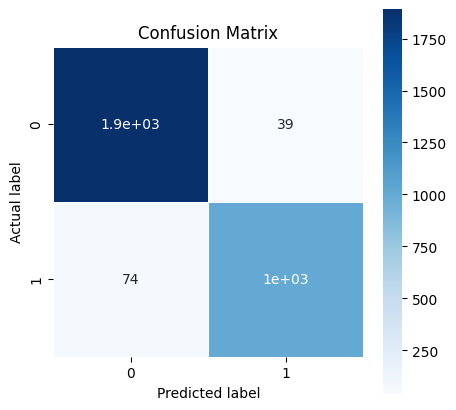

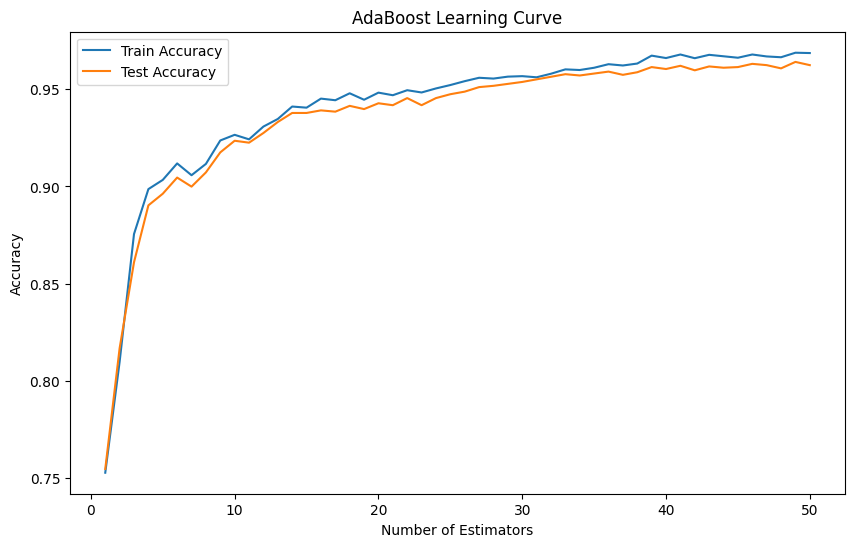

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=50, random_state=42)  # You can adjust n_estimators

# Train the model
model.fit(train_x, train_y)

# Predict on the test set
y_pred = model.predict(test_x)

# Calculate and print accuracy
accuracy = accuracy_score(test_y, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification report:\n", classification_report(test_y, y_pred))

# Create a confusion matrix
cm = confusion_matrix(test_y, y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(data=cm, linewidths=.5, annot=True, square=True, cmap='Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Visualize learning curve
train_scores = []
test_scores = []
estimator_range = range(1, 51)
for n_estimators in estimator_range:
    model = AdaBoostClassifier(n_estimators=n_estimators, random_state=42)
    model.fit(train_x, train_y)
    train_scores.append(model.score(train_x, train_y))
    test_scores.append(model.score(test_x, test_y))

plt.figure(figsize=(10, 6))
plt.plot(estimator_range, train_scores, label='Train Accuracy')
plt.plot(estimator_range, test_scores, label='Test Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('AdaBoost Learning Curve')
plt.legend()
plt.show()


Class imbalance using SMOTE

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE  # Install imbalanced-learn library

# Apply SMOTE for class imbalance
smote = SMOTE(random_state=42)
train_x_resampled, train_y_resampled = smote.fit_resample(train_x, train_y)

# Initialize AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Perform cross-validation using StratifiedKFold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

accuracy_scores = []

for train_index, val_index in skf.split(train_x_resampled, train_y_resampled):
    train_fold_x, val_fold_x = train_x_resampled[train_index], train_x_resampled[val_index]
    train_fold_y, val_fold_y = train_y_resampled[train_index], train_y_resampled[val_index]

    model.fit(train_fold_x, train_fold_y)
    y_pred = model.predict(val_fold_x)
    accuracy_scores.append(accuracy_score(val_fold_y, y_pred))

# Calculate mean accuracy across folds
mean_accuracy = np.mean(accuracy_scores)
print("Mean Cross-Validation Accuracy:", mean_accuracy)

# Train the model on the full resampled training data
model.fit(train_x_resampled, train_y_resampled)

# Predict on the test set
y_pred_test = model.predict(test_x)

# Calculate and print accuracy on test set
test_accuracy = accuracy_score(test_y, y_pred_test)
print("Test Set Accuracy:", test_accuracy)

# Print classification report on test set
print("Test Set Classification Report:\n", classification_report(test_y, y_pred_test))


Mean Cross-Validation Accuracy: 0.965412274064567
Test Set Accuracy: 0.9617559028932491
Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1930
           1       0.95      0.95      0.95      1077

    accuracy                           0.96      3007
   macro avg       0.96      0.96      0.96      3007
weighted avg       0.96      0.96      0.96      3007



Creating an ensemble model that combines the predictions of multiple ensemble methods like Random Forest, Gradient Boosting, and XGBoost.

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Initialize individual ensemble models
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Initialize the ensemble of ensembles model
ensemble_of_ensembles = VotingClassifier(estimators=[
    ('random_forest', random_forest),
    ('gradient_boosting', gradient_boosting)
], voting='hard')  # You can also use 'hard' voting

# Train the ensemble of ensembles model
ensemble_of_ensembles.fit(train_x_resampled, train_y_resampled)

# Predict on the test set using the ensemble of ensembles
y_pred_ensemble = ensemble_of_ensembles.predict(test_x)

# Calculate accuracy on the test set
accuracy_ensemble = accuracy_score(test_y, y_pred_ensemble)
print("Ensemble of Ensembles Test Set Accuracy:", accuracy_ensemble)


Ensemble of Ensembles Test Set Accuracy: 0.9787163285666778


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Initialize individual ensemble models
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Initialize the ensemble of ensembles model
ensemble_of_ensembles = VotingClassifier(estimators=[
    ('random_forest', random_forest),
    ('gradient_boosting', gradient_boosting),
    ('xgb_classifier', xgb_classifier)
], voting='hard')  # You can also use 'hard' voting

# Train the ensemble of ensembles model
ensemble_of_ensembles.fit(train_x_resampled, train_y_resampled)

# Predict on the test set using the ensemble of ensembles
y_pred_ensemble = ensemble_of_ensembles.predict(test_x)

# Calculate accuracy on the test set
accuracy_ensemble = accuracy_score(test_y, y_pred_ensemble)
print("Ensemble of Ensembles Test Set Accuracy:", accuracy_ensemble)


Ensemble of Ensembles Test Set Accuracy: 0.9900232790156301


Artificial Neural Network (ANN)



In [ ]:
!pip install tensorflow scikit-learn


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score

# Load and preprocess your non-image data
# train_x, train_y, val_x, val_y, test_x, test_y = ...

# Create an ANN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(train_x.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_x, train_y,
    validation_data=(val_x, val_y),
    batch_size=32,
    epochs=10
)

# Evaluate on test set
test_loss, test_acc = model.evaluate(test_x, test_y)
print("Test Accuracy:", test_acc)


Epoch 1/10
301/301 [==============================] - 5s 9ms/step - loss: 0.2178 - accuracy: 0.9116 - val_loss: 0.0930 - val_accuracy: 0.9701
Epoch 2/10
301/301 [==============================] - 2s 6ms/step - loss: 0.0943 - accuracy: 0.9689 - val_loss: 0.0728 - val_accuracy: 0.9780
Epoch 3/10
301/301 [==============================] - 1s 5ms/step - loss: 0.0711 - accuracy: 0.9771 - val_loss: 0.0653 - val_accuracy: 0.9813
Epoch 4/10
301/301 [==============================] - 1s 4ms/step - loss: 0.0588 - accuracy: 0.9810 - val_loss: 0.0607 - val_accuracy: 0.9817
Epoch 5/10
301/301 [==============================] - 1s 4ms/step - loss: 0.0556 - accuracy: 0.9814 - val_loss: 0.0577 - val_accuracy: 0.9805
Epoch 6/10
301/301 [==============================] - 1s 3ms/step - loss: 0.0448 - accuracy: 0.9874 - val_loss: 0.0556 - val_accuracy: 0.9809
Epoch 7/10
301/301 [==============================] - 1s 3ms/step - loss: 0.0380 - accuracy: 0.9879 - val_loss: 0.0615 - val_accuracy: 0.9813
Epoch 